#### Importing Important Libraries
Here importing the important libraries which we use for data exploration, data preprocessing and data analysis 
- **Pandas :** we use pandas library to create dataframes, data cleaning and analysis
- **Numpy  :** we use numpy library for numerical computations, creating n-dimentional arrays
- **Seaborn :** We use seaborn library becasue it more comfortable in handling pandas data frames for interactive visualization
- **Matplotlib :** We also use matplotlib libraray for the basic visualization of dafaframes and numpy arrays
- **Scikitlearn :** ScikitLearn Library is used for statistical and  machine learning modeling ( Classification, regression, and dimensionality reduction) and also contains many preprocessing and other useful tools.

In [2]:
# importing important libraries
import pandas as pd 
import numpy as np
import seaborn as sns

# visualization libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Preprocessing Libraries
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder, StandardScaler

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 1. Data Understanding and Exploration

### 1.1. Meaning and Type of Features; Analysis of Distributions (3-4)

#### Load the dataset
Here we are uploading the Car advert data .csv file form our local computer

In [3]:
# Uploading the Car Advert data file from your local computer
df = pd.read_csv('adverts (1).csv')
#df.head()

#### Sample observations
Here displaying the random samples from dataframe

In [4]:
# displaying 10 sample obervations
df.sample(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
79514,202009224044329,65000.0,11,Black,Nissan,Qashqai,USED,2011.0,5600,SUV,False,Petrol
26472,202010145002327,7277.0,20,Black,Kia,XCeed,USED,2020.0,19995,SUV,False,Petrol
274353,202010195161701,30808.0,68,Black,Nissan,Qashqai,USED,2018.0,14795,SUV,False,Petrol
127321,202009244143461,83775.0,17,Black,Mercedes-Benz,E Class,USED,2017.0,15280,Saloon,False,Diesel
292395,202005259543852,0.0,NaN,Red,Lexus,NX 300h,NEW,NaN,36756,SUV,False,Petrol Hybrid
169284,202008283056090,46132.0,63,White,MINI,Hatch,USED,2013.0,6500,Hatchback,False,Diesel
133959,202010285538918,9785.0,19,Grey,Volkswagen,Tiguan,USED,2019.0,29995,SUV,False,Petrol
262921,202010064678216,10.0,NaN,Blue,Audi,Q7,NEW,NaN,54367,SUV,False,Diesel
36412,202009234115775,16638.0,62,Grey,Audi,Q3,USED,2012.0,14000,SUV,False,Diesel
347929,202010285539536,12413.0,64,Black,Suzuki,SX4,USED,2014.0,6499,Hatchback,False,Petrol


#### Correct parsing of data
Here displaying the first 5 rows of dataframe by .head() method

In [5]:
#displaying the first 5 rows with .head()
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [6]:
# Displaying rows and columns of dataset 
df.shape

(402005, 12)

There are 402005 rows and 12 columns in the dataset.

In [7]:
# to show the number of columns/varibles in the dataset
df.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

#### Analyse data distributions (e.g., range, centrality, dispersion, shape)

In [8]:
# A quick description of the dataframe with .info()
# Noticed missing values in some features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [9]:
# set 'public_reference' as index columns 
df = df.set_index('public_reference')

In [10]:
#Let's look at the numeric values with .describe()
df.describe()

,mileage,year_of_registration,price
count,401878.000000,368694.000000,4.020050e+05
mean,37743.595656,2015.006206,1.734197e+04
std,34831.724018,7.962667,4.643746e+04
min,0.000000,999.000000,1.200000e+02
25%,10481.000000,2013.000000,7.495000e+03
50%,28629.500000,2016.000000,1.260000e+04
75%,56875.750000,2018.000000,2.000000e+04
max,999999.000000,2020.000000,9.999999e+06


From above we can see the statistics of numerical columns, there are some missing values in mileage and year_of_registration column, and also there is zero minimum value in mileage cloumn and 999 in year_of_registration which is not possible,we will therefore categorize them as noise which we will remove

In [11]:
#Let's look at the non-numeric values with .describe()
df.describe(include='object')

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type
count,370148,396627,402005,402005,402005,401168,401404
unique,72,22,110,1168,2,16,9
top,17,Black,BMW,Golf,USED,Hatchback,Petrol
freq,36738,86287,37376,11583,370756,167315,216929


In [12]:
# To check the descriptive statistics on whole dataset
df.describe(include = 'all')

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
count,401878.000000,370148,396627,402005,402005,402005,368694.000000,4.020050e+05,401168,402005,401404
unique,NaN,72,22,110,1168,2,NaN,NaN,16,2,9
top,NaN,17,Black,BMW,Golf,USED,NaN,NaN,Hatchback,False,Petrol
freq,NaN,36738,86287,37376,11583,370756,NaN,NaN,167315,400210,216929
mean,37743.595656,NaN,NaN,NaN,NaN,NaN,2015.006206,1.734197e+04,NaN,NaN,NaN
std,34831.724018,NaN,NaN,NaN,NaN,NaN,7.962667,4.643746e+04,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,999.000000,1.200000e+02,NaN,NaN,NaN
25%,10481.000000,NaN,NaN,NaN,NaN,NaN,2013.000000,7.495000e+03,NaN,NaN,NaN
50%,28629.500000,NaN,NaN,NaN,NaN,NaN,2016.000000,1.260000e+04,NaN,NaN,NaN
75%,56875.750000,NaN,NaN,NaN,NaN,NaN,2018.000000,2.000000e+04,NaN,NaN,NaN


#### Identifying Quantitative and Qualitative features

In [13]:
# data types of variables of dataframe
df.dtypes

mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

There are 2 quantitative (price & mileage) columns while other 9 are qualitative columns in dataset we have 2 float columns, one integer and one bool column and 7 object/categorical columns

In [14]:
# Creating list of all categorical features
cat_feat_lst = df.select_dtypes(include = ['object']).columns
cat_feat_lst.tolist()

['reg_code',
 'standard_colour',
 'standard_make',
 'standard_model',
 'vehicle_condition',
 'body_type',
 'fuel_type']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

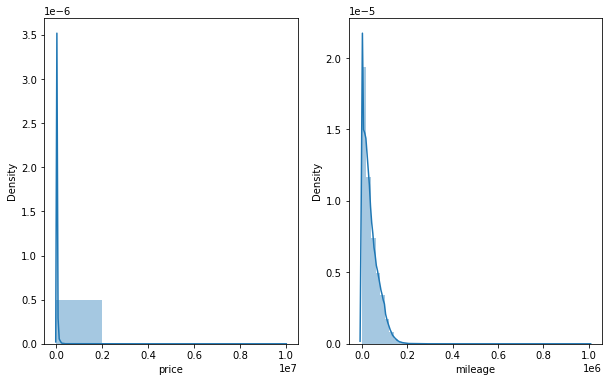

In [17]:
# Distribution plot of mileage and price features
plt.figure(figsize=[10,6])
plt.subplot(121)
sns.distplot(df['price'], bins=5)
plt.subplot(122)
sns.distplot(df['mileage'])

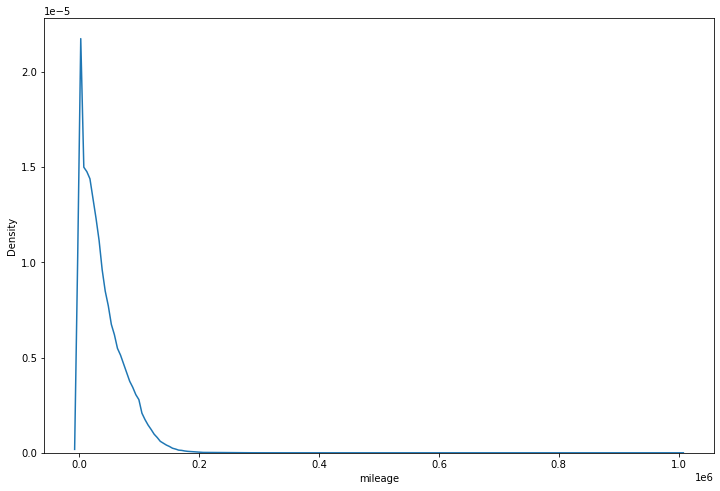

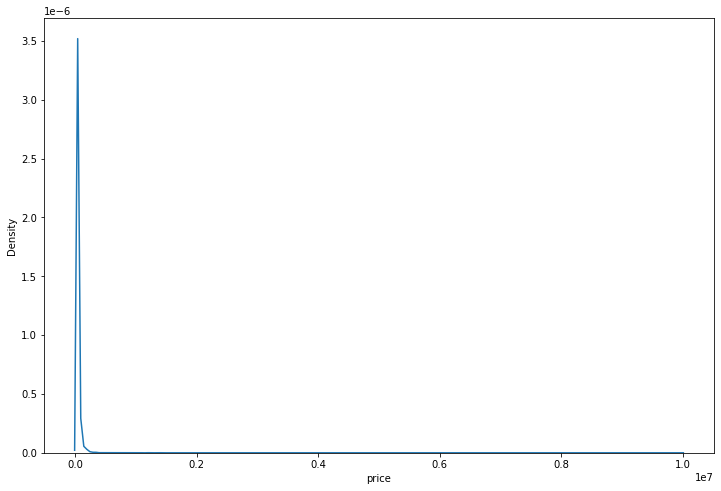

In [18]:
# Density plots of numerical features
num_feat_lst = ['mileage','price']
for feature in num_feat_lst:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=df, x=feature, palette="crest")
    #plt.xscale('log')
    plt.show()

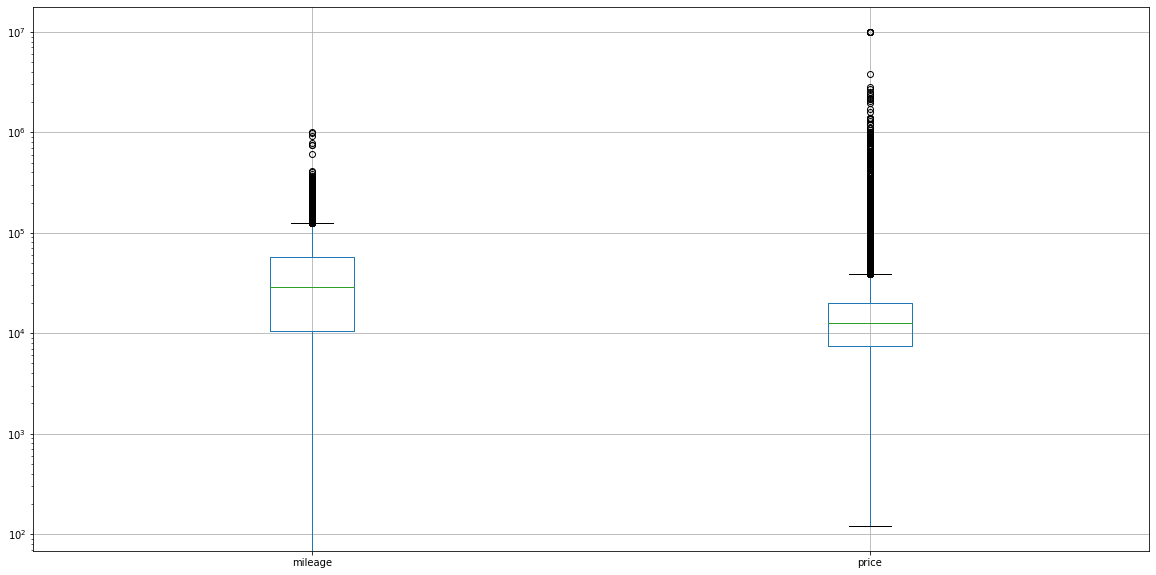

In [19]:
# Boxplots of numerical features on logrithimic scale
num_feat= ['mileage', 'price']
plt.figure(figsize=(20,10))
df[num_feat].boxplot()
plt.yscale("log")

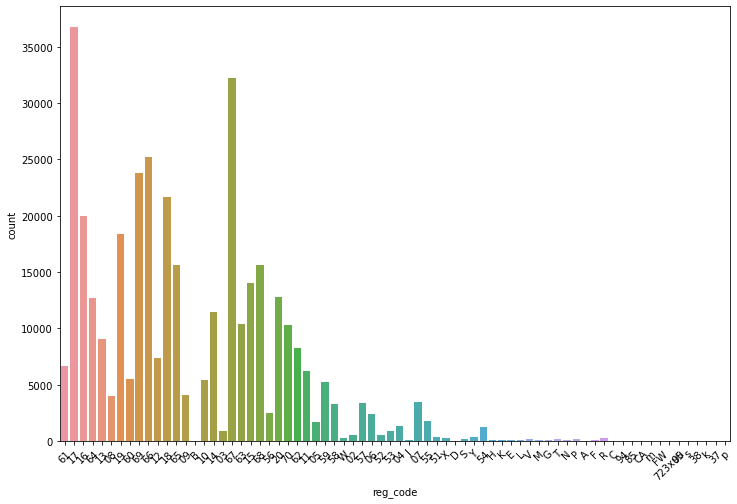

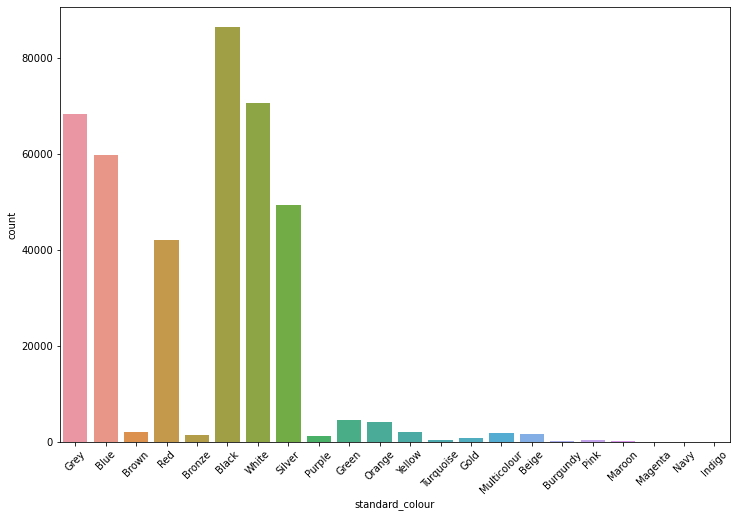

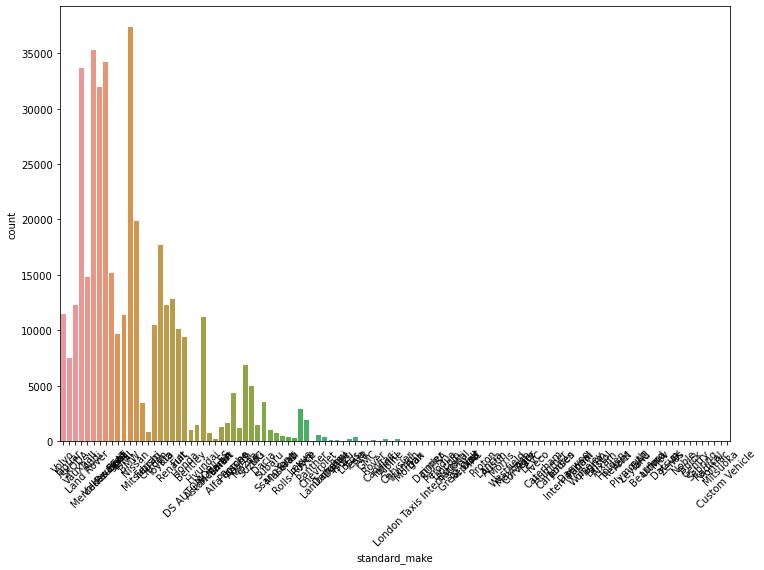

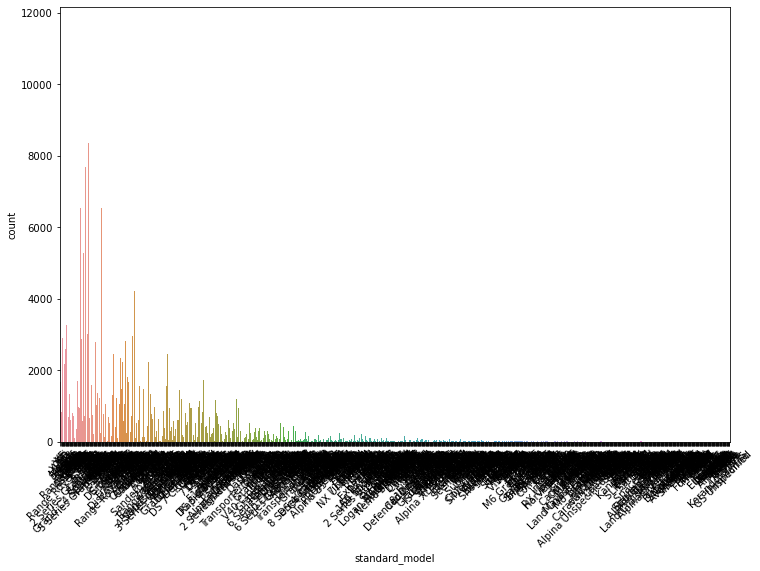

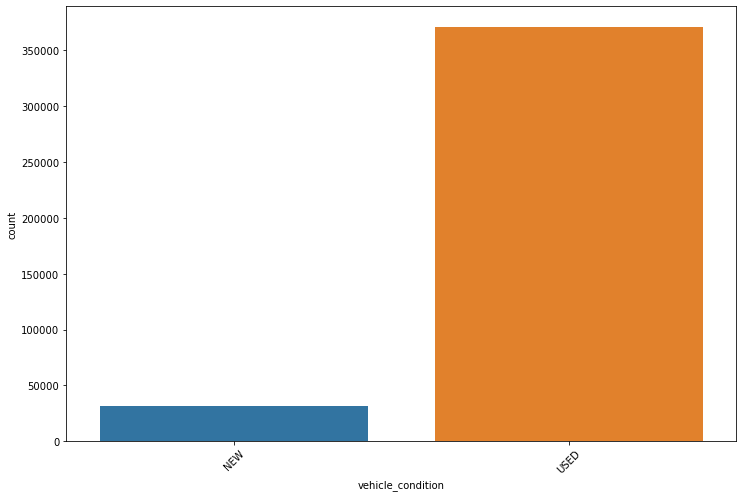

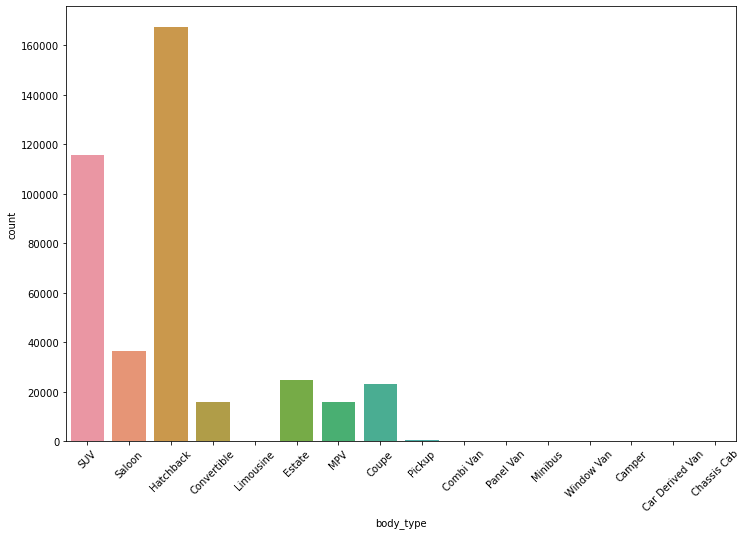

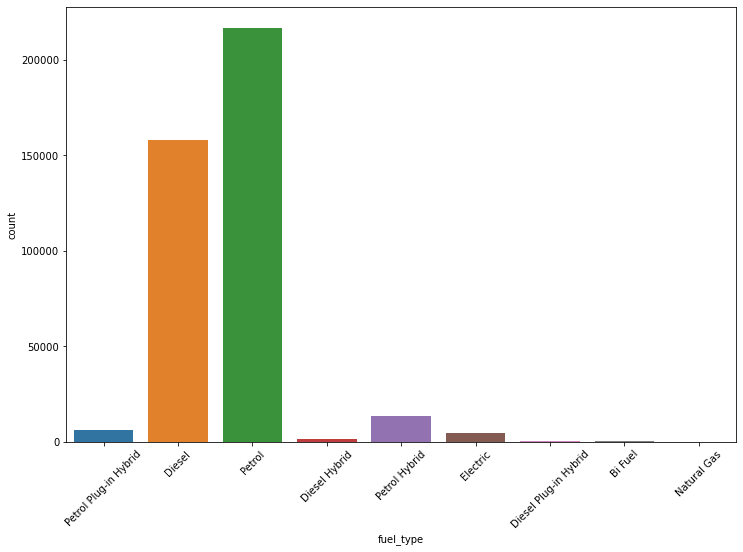

In [20]:
# Count plots of categorical features
for feature in cat_feat_lst:
    plt.figure(figsize=(12,8))
    sns.countplot(x=df[feature])
    #plt.xscale('log')
    plt.xticks(rotation=45)
    plt.show()

### 1.2. Identification/Commenting on Missing Values (2-3)

#### Missing Values

In [21]:
# count missing values(NANs) in each column of dataset
df.isna().sum()

mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

From above we can see the missing values in mileage, reg_code, standard_colour and year_of_registration, body_type and fuel_type columns.

In [22]:
# finding the missing values of year_of_registration by reg_code 
reg_cod_lst = df['reg_code'].unique().tolist()
sum_t = 0
for k in reg_cod_lst:
    null_sum = df[df['reg_code']== k]['year_of_registration'].isna().sum()
    sum_t += null_sum
    #print(f"Missing value in reg_code {k} are {null_sum} can be replaced by {v}")
print(f'Total mising values in year_of_registration related to reg_code are {sum_t}')

Total mising values in year_of_registration related to reg_code are 1741


In [23]:
# Finding missing values in year_of_registration grouped with vechile_condition by NEW CARs 
df.groupby('vehicle_condition')['year_of_registration'].get_group('NEW').isna().sum()

31249

Here, we can see the moslty missing values in year of registration column are related to NEW Cars 

In [24]:
# Finding missing values in year_of_registration grouped with vechile_condition by USED CARs 
df.groupby('vehicle_condition')['year_of_registration'].get_group('USED').isna().sum()

2062

In [25]:
# finding the Duplicate values 
df.duplicated().sum()

8627

There are 8627 duplicate values in dataset

In [26]:
# droping Duplicate values
df = df.drop_duplicates()

### 1.3. Identification/Commenting on Outliers and Noise (1-2)

#### Outliers

In [27]:
# finding top 20 minimum "price" values
df["price"].value_counts().sort_index(ascending=True).head(20)

120     1
122     1
150     1
180     1
200     3
225     1
240     1
250    10
258     1
279     1
290     2
295     7
298     1
299     1
300    15
310     1
325     2
345     1
350    22
354     1
Name: price, dtype: int64

Here, we can see that the minimum price is gerater then 100

In [28]:
# finding top 20 maximum "price" values
df["price"].value_counts().sort_index(ascending=False).head(20)

9999999    6
3799995    1
2850000    1
2695000    1
2500000    1
2400000    1
2299950    1
2195000    1
2150000    2
2049950    1
1950000    1
1699995    1
1590000    1
1400000    1
1395000    1
1350000    2
1295000    1
1200000    3
1100000    1
1099950    1
Name: price, dtype: int64

here from above prices there is top 20 high price range for the column, we can see the high price is 9,999,999 when compared to other there is big difference. So we need to remove this outlier.

In [29]:
# finding top 20 minimum "mileage" values
df["mileage"].value_counts().sort_index(ascending=True).head(20)

0.0     11468
1.0       671
2.0       135
3.0       131
4.0       158
5.0      2220
6.0       259
7.0       170
8.0       327
9.0       231
10.0    10508
11.0      228
12.0      216
13.0       70
14.0       93
15.0      722
16.0       67
17.0       40
18.0       46
19.0       52
Name: mileage, dtype: int64

Here we can the most of the values are related to 0 mileage, which is of new cars. 

In [30]:
# finding top 20 maximum "mileage" values
df["mileage"].value_counts().sort_index(ascending=False).head(20)

999999.0    1
990000.0    1
930000.0    1
788072.0    1
740000.0    2
611121.0    1
413079.0    1
400321.0    1
388000.0    1
368199.0    1
360000.0    1
356744.0    1
355000.0    1
351000.0    1
350000.0    1
340000.0    1
339654.0    1
339000.0    1
336793.0    1
336472.0    1
Name: mileage, dtype: int64

## 2. Data Processing 
### 2.1. Dealing with Missing Values, Outliers, and Noise (1-2) 

here from above prices there is top 20 high price range for the column, we can see the high price is 9,999,999 when compared to other there is big difference. So we need to remove this outlier.

In [31]:
# finding the 10% price values from both max and min ends 
sort_ = sorted(df['price'])
q1, q2 = np.percentile(sort_,[10,90])
print(q1,q2)

3995.0 31500.0


In [32]:
# setting the range of price between 3996.0 and 31500
df = df[(df.price <=31500.0) & (df.price >=3995.0)]
df.shape

(315018, 11)

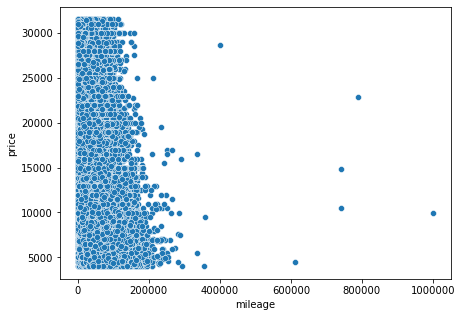

In [33]:
# Visualizing the scatter plot of mileage and price
plt.figure(figsize=[7,5])
ax = sns.scatterplot(x = df['mileage'], y=df['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

we can see in the above scatter plot most of the mileage values are less than 300000, so need to remove other values 

In [34]:
# setting mileage range less than 300000
df = df[(df.mileage<300000)]
# droping mileage values equals to 0
df.drop(df[df['mileage']==0.0].index,inplace=True)

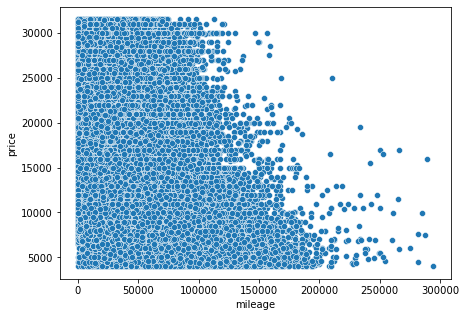

In [35]:
# ploting the sctter plot of mileage and price
plt.figure(figsize=[7,5])
ax = sns.scatterplot(x = df['mileage'], y=df['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [36]:
# descriptive statistics of year of registration columns.
df["year_of_registration"].describe()

count    299063.000000
mean       2015.667398
std           7.761562
min         999.000000
25%        2014.000000
50%        2017.000000
75%        2018.000000
max        2020.000000
Name: year_of_registration, dtype: float64

In [37]:
# finding space in strings values 
df['reg_code'].str.isspace().sum()

0

In [38]:
# Removing noise in reg_code feature
df['reg_code'] = df['reg_code'].str.strip()

In [39]:
# Removing noise in reg_code feature
df['reg_code'] = df['reg_code'].str.upper()

In [40]:
df['reg_code'].unique()

array(['61', '17', '16', '64', '13', '08', '60', '69', '19', '66', nan,
       '12', '18', '65', '10', '14', '03', '67', '63', '15', '09', '68',
       '20', '70', '05', '62', '02', '57', 'J', '07', '56', '11', '55',
       '59', 'D', 'Y', '51', 'X', '06', 'K', '54', 'W', 'E', '58', '04',
       '53', 'L', 'V', '52', 'H', 'T', 'S', 'N', 'P', 'G', 'B', 'A', 'M',
       'C', '94', 'R', 'F', '85', 'CA', 'FW', '95', '38', '37'],
      dtype=object)

In [41]:
# creating a dictionary to assigining the year_of_rigistarion to related reg_code and the reference for 
# assignment of these years value is given below
# https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_the_United_Kingdom
year_reg_dict = {'61': 2011, '17':2017, '16':2016, '64':2014, '13':2013, '08':2008, '19':2019, '60':2010, '69':2019, '66':2016,
                 '12':2012, '18':2018, '65':2015, '09':2009, 'B':1984, '10':2010, '14':2014, '03':2003, '67':2017, '63':2013,
                 '15':2015,'68':2018, '56':2006, '20':2020, '70':2020, '62':2012, '11':2011, '05':2005, '59':2009, '58':2008, 
                 'W':2000, '02':2002, '57':2007, '06':2006, '52':2002, '53':2003, '04':2004, 'J':1991, '07':2007, '55':2005, 
                 '51':2001, 'X':2000, 'D':1986, 'S':1998, 'Y':2001, '54':2004, 'H':1990, 'K':1992, 'E':1987, 'L':1993, 'V':1999,
                 'M':1994, 'G':1989, 'T':1999, 'N':1995, 'P':1996, 'A':1983, 'F':1988, 'R':1997, 'C':1985, '94':np.nan, '85':np.nan,
                 'CA':np.nan, 'FW':1974, '723XUU':1964, '95':np.nan, '38':np.nan, '37':np.nan}

In [42]:
# Replacing the missing values by actual values using the wikipeida reference
for k,v in year_reg_dict.items():
    df_1 = df[(df['reg_code']== k) & (df['year_of_registration'].isna())]['year_of_registration'].replace(np.nan, v)
    df.update(df_1)

In [45]:
# finding median value of registration related to used vehicle condition 
used_median = df.groupby('vehicle_condition')['year_of_registration'].get_group('USED').median()

In [46]:
# Replacing missing values of registration related to used vehicle condition by median value 
df_used = df[(df['vehicle_condition']== 'USED') & (df['year_of_registration'].isna())]['year_of_registration'].fillna(used_median)
df.update(df_used)

In [47]:
# finding values between 1900 to 2020
(df['year_of_registration'].between(1900,2020)).sum() / df.shape[0]

0.973656504400841

In [48]:
# set range of registration year between 1900 and 2020
df = df[df['year_of_registration'].between(1900, 2020)]

In [49]:
# converting datatype of registration year into intiger 
df['year_of_registration'] = df['year_of_registration'].astype('int64')

In [51]:
# counting categories of vehicle condition
df['vehicle_condition'].value_counts()

USED    300559
Name: vehicle_condition, dtype: int64

We can see 300559 are USED vehicles.

In [52]:
# count the categorical values in crossover_car_and_van columns
df["crossover_car_and_van"].value_counts()

False    299300
True       1259
Name: crossover_car_and_van, dtype: int64

1259 vehicles are crossover.

**Replacing missing values of mileage feature by median values based on groups standard_make and standard_model.**

In [53]:
# finding mileage median values related to car brands and car models 
def find_mileage_median(x):
    make = x.name[0]
    if x.count() > 0:
        return x.median() # It Returns median if the median exists for the model.
    elif df.groupby(['standard_make'])['mileage'].count()[make] > 0:
        make_median = df.groupby(['standard_make'])['mileage'].apply(lambda x: x.median())[make]
        return make_median # It Return median if particular car make,
    else:             
        return df['mileage'].median() # It returns the median of 'mileage' feature.
    
m_median = df.groupby(['standard_make','standard_model'])['mileage'].apply(find_mileage_median).reset_index()
m_median.rename(columns={'mileage': 'mileage_med'}, inplace=True)
m_median.head()

,standard_make,standard_model,mileage_med
0,Abarth,124 Spider,11000.0
1,Abarth,500,48000.0
2,Abarth,500C,36527.0
3,Abarth,595,16806.0
4,Abarth,595C,15201.0


In [54]:
# applying median values to null values in mileage columns 
def median_value(x):
    if pd.isnull(x['mileage']):
        return m_median[(m_median['standard_make'] == x['standard_make']) & (m_median['standard_model'] == x['standard_model'])]['mileage_med'].values[0]
    else:
        return x['mileage']
    
df['mileage'] = df.apply(median_value, axis=1)

**Replacing missing values of Fuel_type feature by mode value based on groups standard_make and standard_model.**

In [55]:
# finding fuel_type mode values related to car brands and car models 
def find_fuelType_mode(x):
    make = x.name[0]
    if x.count() > 0:
        return x.mode() # It Returns mode if the mode exists for the model.
    elif df.groupby(['standard_make'])['fuel_type'].count()[make] > 0:
        make_mode = df.groupby(['standard_make'])['fuel_type'].apply(lambda x: x.mode())[make]
        return make_mode # It Return mode if particular car make,
    else:             
        return df['fuel_type'].mode() # It returns the mode of 'fuel_type' feature.
    
ft_mode = df.groupby(['standard_make','standard_model'])['fuel_type'].apply(find_fuelType_mode).reset_index().drop('level_2', axis=1)
ft_mode.rename(columns={'fuel_type': 'fuel_type_mod'}, inplace=True)
ft_mode.head()

,standard_make,standard_model,fuel_type_mod
0,Abarth,124 Spider,Petrol
1,Abarth,500,Petrol
2,Abarth,500C,Petrol
3,Abarth,595,Petrol
4,Abarth,595C,Petrol


In [56]:
# applying mode values to null values in fuel_type column
def mode_value(x):
    if pd.isnull(x['fuel_type']):
        return ft_mode[(ft_mode['standard_make'] == x['standard_make']) & (ft_mode['standard_model'] == x['standard_model'])]['fuel_type_mod'].values[0]
    else:
        return x['fuel_type']
    
df['fuel_type'] = df.apply(mode_value, axis=1)
df.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
public_reference,,,,,,,,,,,
202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011,7000,Saloon,False,Diesel
202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017,14000,SUV,False,Petrol
202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016,7995,Hatchback,False,Diesel
202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015,26995,SUV,False,Diesel
202009304412074,16000.0,17,Blue,Audi,S5,USED,2017,29000,Convertible,False,Petrol


**Replacing missing values of Body_Type feature by mode values based on groups standard_make and standard_model.**

In [57]:
# finding body_type mode values related to car brands and car models 
def find_bodyType_mode(x):
    make = x.name[0]
    if x.count() > 0:
        return x.mode() # It Returns mode if the mode exists for the model.
    elif df.groupby(['standard_make'])['body_type'].count()[make] > 0:
        make_mode = df.groupby(['standard_make'])['body_type'].apply(lambda x: x.mode())[make]
        return make_mode # It Return mode if particular car make,
    else:             
        return df['body_type'].mode() # It returns the mode of 'body_type' feature.
    
bt_mode = df.groupby(['standard_make','standard_model'])['body_type'].apply(find_bodyType_mode).reset_index().drop('level_2', axis=1)
bt_mode.rename(columns={'body_type': 'body_type_mod'}, inplace=True)
bt_mode.head()

,standard_make,standard_model,body_type_mod
0,Abarth,124 Spider,Convertible
1,Abarth,500,Hatchback
2,Abarth,500C,Convertible
3,Abarth,595,Hatchback
4,Abarth,595C,Convertible


In [58]:
# applying mode values to null values body_type column
def mode_value(x):
    if pd.isnull(x['body_type']):
        return bt_mode[(bt_mode['standard_make'] == x['standard_make']) & (bt_mode['standard_model'] == x['standard_model'])]['body_type_mod'].values[0]
    else:
        return x['body_type']
    
df['body_type'] = df.apply(mode_value, axis=1)
df.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
public_reference,,,,,,,,,,,
202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011,7000,Saloon,False,Diesel
202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017,14000,SUV,False,Petrol
202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016,7995,Hatchback,False,Diesel
202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015,26995,SUV,False,Diesel
202009304412074,16000.0,17,Blue,Audi,S5,USED,2017,29000,Convertible,False,Petrol


**Replacing missing values of Standard_Colour feature by median values based on groups standard_make and standard_model**

In [69]:
# finding Standard_colour mode values related to car brands and car models 
def find_stdColour_mode(x):
    make = x.name[0]
    if x.count() > 0:
        return x.mode() # It Returns mode if the mode exists for the model.
    elif df.groupby(['standard_make'])['standard_colour'].count()[make] > 0:
        make_mode = df.groupby(['standard_make'])['standard_colour'].apply(lambda x: x.mode())[make]
        return make_mode # It Return mode if particular car make,
    else:             
        return df['standard_colour'].mode() # It returns the mode of 'standard_colour' feature.
    
stdC_mode = df.groupby(['standard_make','standard_model'])['standard_colour'].apply(find_stdColour_mode).reset_index().drop('level_2', axis=1)
stdC_mode.rename(columns={'standard_colour': 'standard_colour_mod'}, inplace=True)
stdC_mode.head()

,standard_make,standard_model,standard_colour_mod
0,Abarth,124 Spider,Red
1,Abarth,500,White
2,Abarth,500C,Grey
3,Abarth,595,Grey
4,Abarth,595C,Grey


In [70]:
# applying mode values to null values in standard colour column
def mode_value(x):
    if pd.isnull(x['standard_colour']):
        return stdC_mode[(stdC_mode['standard_make'] == x['standard_make']) & (stdC_mode['standard_model'] == x['standard_model'])]['standard_colour_mod'].values[0]
    else:
        return x['standard_colour']
    
df['standard_colour'] = df.apply(mode_value, axis=1)
df.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
public_reference,,,,,,,,,,,
202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011,7000,Saloon,False,Diesel
202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017,14000,SUV,False,Petrol
202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016,7995,Hatchback,False,Diesel
202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015,26995,SUV,False,Diesel
202009304412074,16000.0,17,Blue,Audi,S5,USED,2017,29000,Convertible,False,Petrol


In [71]:
# droping reg_code column there are many missing values
df = df.drop('reg_code', axis =1)

**capitalization issues, extra spaces on strings**

In [72]:
# capitalization issues, extra spaces on strings
df['standard_model'] = df['standard_model'].str.upper()
# Removing capatlize issue in standard_make
df['standard_make'] = df['standard_make'].str.upper()
# Removing capatlize issue in standard_colour
df['standard_colour'] = df['standard_colour'].str.upper()
# Removing capatlize issue in vehicle_condition
df['vehicle_condition'] = df['vehicle_condition'].str.upper()
# Removing capatlize issue in fuel_type
df['fuel_type'] = df['fuel_type'].str.upper()
# Removing capatlize issue in body_type
df['body_type'] = df['body_type'].str.upper()

In [73]:
# null values in each feature
df.isna().sum().sort_values(ascending=False)

mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

Now we can see there is no any missing value in the dataset.

### 2.2. Feature Engineering, Data Transformations (2-3) 

In [74]:
# transform crossover_car_and_van values into False=0 and True=1
df['crossover_car_and_van'] = df['crossover_car_and_van'].apply(lambda x: 0 if x == False else 1)

In [75]:
# transform vehicle_condition values into USED=0 and NEW=1
#df['vehicle_condition'] = df['vehicle_condition'].apply(lambda x: 0 if x == 'USED' else 1)

In [76]:
# Converting year and mileage values into integer.
df['year_of_registration'] = df['year_of_registration'].astype('int64')
df['mileage'] = df['mileage'].astype('int64')

In [77]:
# displaying datatypes of each variables
df.dtypes

mileage                   int64
standard_colour          object
standard_make            object
standard_model           object
vehicle_condition        object
year_of_registration      int64
price                     int64
body_type                object
crossover_car_and_van     int64
fuel_type                object
dtype: object

In [78]:
# Creating new feature age of vehicle
df['veh_age_years'] = df['year_of_registration'].max() - df['year_of_registration'] # Calculating age of vehicle by subtracting registration year from 2020

# Creating new feature average mileage per year of vehicle
df['avg_miles_per_year'] = df['mileage'] / df['veh_age_years'] # Calculating average mileage of vehicle by dividing mileage by age of vehicle.

In [79]:
df['avg_miles_per_year'].describe()

count    3.077970e+05
mean              inf
std               NaN
min      2.127660e-02
25%      6.071000e+03
50%      8.875000e+03
75%      1.316425e+04
max               inf
Name: avg_miles_per_year, dtype: float64

In [80]:
# check for infinity values of new created feature avg_mile
df[np.isinf(df['avg_miles_per_year'])]

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,veh_age_years,avg_miles_per_year
public_reference,,,,,,,,,,,,
201911043995897,5,BLACK,NISSAN,X-TRAIL,NEW,2020,27595,SUV,0,DIESEL,0,inf
202008152524052,4290,BLUE,VOLKSWAGEN,GOLF,USED,2020,28190,HATCHBACK,0,PETROL,0,inf
202008242869411,3000,RED,VOLVO,XC40,USED,2020,29895,SUV,0,PETROL,0,inf
202008272982414,1983,GREY,VOLKSWAGEN,T-ROC,USED,2020,23000,SUV,0,DIESEL,0,inf
202009093500509,663,WHITE,SEAT,TARRACO,USED,2020,27490,SUV,0,PETROL,0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
202010054614414,3653,GREY,SKODA,SUPERB,USED,2020,27495,HATCHBACK,0,PETROL PLUG-IN HYBRID,0,inf
202010134932433,2034,RED,VOLKSWAGEN,T-ROC,USED,2020,23800,SUV,0,PETROL,0,inf
202010195177111,7456,BLUE,NISSAN,QASHQAI,USED,2020,16999,SUV,0,PETROL,0,inf


In [81]:
# converting null and infinite values into to 0 of type 'int'
df['avg_miles_per_year'] = pd.to_numeric(df['avg_miles_per_year'], errors='coerce')
df['avg_miles_per_year'] = df['avg_miles_per_year'].replace(np.inf, int(float(0)))
df['avg_miles_per_year'] = df['avg_miles_per_year'].fillna(0).astype(int)
df['avg_miles_per_year'] = df['avg_miles_per_year'].astype('int64') 

In [82]:
# display dataframe by head method
df.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,veh_age_years,avg_miles_per_year
public_reference,,,,,,,,,,,,
202007020778260,108230,BLUE,JAGUAR,XF,USED,2011,7000,SALOON,0,DIESEL,9,12025
202007020778474,7800,GREY,SKODA,YETI,USED,2017,14000,SUV,0,PETROL,3,2600
202007080986776,45000,BROWN,VAUXHALL,MOKKA,USED,2016,7995,HATCHBACK,0,DIESEL,4,11250
202007161321269,64000,GREY,LAND ROVER,RANGE ROVER SPORT,USED,2015,26995,SUV,0,DIESEL,5,12800
202009304412074,16000,BLUE,AUDI,S5,USED,2017,29000,CONVERTIBLE,0,PETROL,3,5333


In [83]:
# display unique values in crossover_car_and_van column
print(df['crossover_car_and_van'].unique())
print(f'Unique Values : {df["crossover_car_and_van"].nunique()}')

[0 1]
Unique Values : 2


In [84]:
# display unique values in standard_colour column
print(df['standard_colour'].unique())
print(f'Unique Values : {df["standard_colour"].nunique()}')

['BLUE' 'GREY' 'BROWN' 'RED' 'BRONZE' 'BLACK' 'WHITE' 'SILVER' 'PURPLE'
 'GREEN' 'ORANGE' 'YELLOW' 'TURQUOISE' 'GOLD' 'BEIGE' 'BURGUNDY'
 'MULTICOLOUR' 'PINK' 'MAROON' 'MAGENTA' 'NAVY' 'INDIGO']
Unique Values : 22


In [85]:
# display unique values in standard_make column
print(df['standard_make'].unique())
print(f'Unique Values : {df["standard_make"].nunique()}')

['JAGUAR' 'SKODA' 'VAUXHALL' 'LAND ROVER' 'AUDI' 'MERCEDES-BENZ'
 'VOLKSWAGEN' 'PEUGEOT' 'SEAT' 'MINI' 'BMW' 'NISSAN' 'CITROEN' 'TOYOTA'
 'KIA' 'VOLVO' 'RENAULT' 'HONDA' 'DS AUTOMOBILES' 'HYUNDAI' 'FIAT' 'SMART'
 'PORSCHE' 'MITSUBISHI' 'ABARTH' 'MAZDA' 'SUZUKI' 'MG' 'DACIA' 'SUBARU'
 'SSANGYONG' 'ALFA ROMEO' 'LEXUS' 'MASERATI' 'JEEP' 'BENTLEY' 'PANTHER'
 'ASTON MARTIN' 'DAIHATSU' 'CHEVROLET' 'ISUZU' 'SAAB' 'TVR' 'ROVER'
 'LOTUS' 'INFINITI' 'CHRYSLER' 'ROLLS-ROYCE' 'CUPRA' 'DAIMLER' 'DODGE'
 'TRIUMPH' 'GREAT WALL' 'TESLA' 'AUSTIN' 'MORRIS' 'WESTFIELD' 'TIGER'
 'HUMMER' 'CATERHAM' 'CADILLAC' 'LONDON TAXIS INTERNATIONAL' 'MORGAN'
 'GMC' 'INTERNATIONAL' 'WOLSELEY' 'PILGRIM' 'LINCOLN' 'HOLDEN' 'JENSEN'
 'RELIANT' 'ARIEL' 'PLYMOUTH' 'CORVETTE' 'IVECO' 'FERRARI' 'LEYLAND'
 'AIXAM' 'BEAUFORD' 'MEV' 'ZENOS' 'LANCIA' 'BUICK' 'GENTRY' 'SEBRING'
 'DAX' 'OPEL' 'PONTIAC' 'MITSUOKA' 'CUSTOM VEHICLE']
Unique Values : 90


In [86]:
# mapping the values of standard_make column
#stand_make_mapping = {'VOLVO':'VOLVO', 'JAGUAR':'JAGUAR', 'SKODA':'SKODA', 'VAUXHALL':'VAUXHALL', 'LAND ROVER':'LAND_ROVER', 'AUDI':'AUDI', 'MERCEDES-BENZ':'MERCEDES_BENZ', 'VOLKSWAGEN':'VOLKSWAGEN', 'PEUGEOT':'PEUGEOT', 'SEAT':'SEAT', 'MINI':'MINI', 'BMW':'BMW',
#                      'NISSAN':'NISSAN', 'MITSUBISHI':'MITSUBISHI', 'FERRARI':'FERRARI', 'CITROEN':'CITROEN', 'TOYOTA':'TOYOTA', 'KIA':'KIA','RENAULT':'RENAULT', 
#                      'FIAT':'FAIT', 'HONDA':'HONDA', 'BENTLEY':'BENTLEY', 'DS AUTOMOBILES':'DS_AUTOMOBILES', 'HYUNDAI':'HYUNDAI', 'ASTON MARTIN':'ASTON_MARTIN', 'MCLAREN':'MCLAREN', 
#                      'SMART':'SMART', 'ALFA ROMEO':'ALFA_ROMEO', 'PORSCHE':'PORSCHE', 'ABARTH':'ABARTH', 'MAZDA':'MAZDA', 'SUZUKI':'SUZUKI', 'MG':'MG', 'DACIA':'DACIA',
#                      'SUBARU':'SUBARU', 'SSANGYONG':'SSYONGYONG', 'MASERATI':'MASERATI', 'SAAB':'SAAB', 'ROLLS-ROYCE':'ROLLS_ROYCE', 'LEXUS':'LEXUS', 'JEEP':'JEEP', 
#                      'PANTHER':'PANTHER', 'CHEVROLET':'CHEVROLET', 'LAMBORGHINI':'LAMBR', 'DAIHATSU':'DAHT', 'DODGE':'DOD', 'ISUZU':'ISU', 'LOTUS':'LOT',
#                      'TESLA':'TSLA', 'TVR':'TVR', 'GMC':'GMC', 'ROVER':'ROVER', 'CADILLAC':'CAD', 'INFINITI':'INF', 'ALPINE':'ALP', 'CHRYSLER':'CHRY', 'TRIUMPH':'TRI', 
#                      'MORGAN':'MOR', 'DAX':'DAX','LONDON TAXIS INTERNATIONAL':'LTI', 'DAIMLER':'DAI', 'CUPRA':'CUP', 'PERODUA':'PER', 'LINCOLN':'LIN', 
#                      'BUGATTI':'BUG', 'GREAT WALL':'GW', 'REPLICA':'REP', 'OPEL':'OPEL', 'AC':'AC', 'PROTON':'PROT', 'LANCIA':'LAN', 'AUSTIN':'AUST', 
#                      'MORRIS':'MORRIS', 'WESTFIELD':'WEST_F', 'MAYBACH':'MAYB', 'CORVETTE':'CORV', 'TIGER':'TIGER', 'LEVC':'LEVC', 
#                      'IVECO':'IVECO', 'CATERHAM':'CATER', 'HUMMER':'HUM', 'CARBODIES':'CARB', 'JENSEN':'JENS', 'INTERNATIONAL':'INTERNAT', 
#                      'DAEWOO':'DAEWO', 'PAGANI':'PAG', 'WOLSELEY':'CUP', 'PILGRIM':'PILG', 'BRISTOL':'BRIS', 'AIXAM':'AIX', 'HOLDEN':'HOLD', 
#                      'RELIANT':'RELI', 'ARIEL':'ARIEL', 'PLYMOUTH':'PLYM', 'LEYLAND':'LEYLD', 'BAC':'BAC', 'BEAUFORD':'BFORD', 'ULTIMA':'ULT',
#                      'MEV':'MEV','DATSUN':'DAT', 'ZENOS':'ZEN', 'AK':'AK', 'NOBLE':'NOB', 'BUICK':'BUICK', 'GENTRY':'GEN', 'SEBRING':'SEBRG',
#                      'RADICAL':'RADCL', 'PONTIAC':'PONT', 'MITSUOKA':'MITKA', 'CUSTOM VEHICLE':'CV'}
#df['standard_make'] = df['standard_make'].map(stand_make_mapping)

In [87]:
# display unique values in standard_model column
print(df['standard_model'].unique())
print(f'Unique Values : {df["standard_model"].nunique()}')

['XF' 'YETI' 'MOKKA' 'RANGE ROVER SPORT' 'S5' 'VIVA' 'RANGE ROVER'
 'S CLASS' 'PASSAT' '208' 'OCTAVIA' 'LEON' 'HATCH' '2 SERIES GRAN TOURER'
 'GOLF' 'X-TRAIL' 'C CLASS' 'CORSA' 'QASHQAI' 'CITIGO'
 'GRAND C4 SPACETOURER' 'YARIS' 'VERSO' 'SORENTO' 'V40' 'KOLEOS' 'V60'
 '5 SERIES GRAN TURISMO' 'A3' '108' 'JAZZ' 'XK8' '7 SERIES' 'POLO'
 'CADDY LIFE' 'INSIGNIA' 'A1' 'C1' 'Q3' 'S4' 'X5' 'NOTE' 'DS 3' 'SOUL'
 'V50' 'CONVERTIBLE' 'IBIZA' 'IX20' 'FABIA' 'XC40' 'E CLASS' 'CLIO'
 'T-ROC' 'TIGUAN' '500C' 'A CLASS' 'MOKKA X' 'MICRA' 'AURIS' '5 SERIES'
 'SCIROCCO' 'TARRACO' 'GOLF SV' '1 SERIES' 'C3 AIRCROSS' 'C-HR' 'KAMIQ'
 'DS 3 CABRIO' 'FORFOUR' 'I800' '500' 'X1' 'CROSSLAND X' 'ZOE' 'A4'
 'RANGE ROVER EVOQUE' 'BOXSTER' 'AYGO' 'RAV4' 'OUTLANDER' '595C'
 'SANTA FE' 'DISCOVERY SPORT' 'CX-5' 'T-CROSS' 'XC60' '4 SERIES' 'I30'
 'GLA CLASS' 'CR-V' 'GL CLASS' 'MAZDA3' 'A5' 'PRIUS+' '3008' 'MIRAGE'
 'KADJAR' 'SWIFT' 'C4 CACTUS' 'CEED' 'CAPTUR' 'IX35' 'E-PACE' 'SPORTAGE'
 'JUKE' 'A6 ALLROAD' 'IGNIS' 'COUNTR

In [88]:
# display unique values in vehicle_condition column
print(df['vehicle_condition'].unique())
print(f'Unique Values : {df["vehicle_condition"].nunique()}')

['USED' 'NEW']
Unique Values : 2


In [89]:
# display unique values in body_type
print(df['body_type'].unique())
print(f'Unique Values : {df["body_type"].nunique()}')

['SALOON' 'SUV' 'HATCHBACK' 'CONVERTIBLE' 'LIMOUSINE' 'ESTATE' 'MPV'
 'COUPE' 'COMBI VAN' 'PICKUP' 'MINIBUS' 'PANEL VAN' 'CAMPER' 'WINDOW VAN'
 'CAR DERIVED VAN' 'CHASSIS CAB']
Unique Values : 16


In [90]:
# mapping the values of body_type column
#BT_mapping = {'SUV':'SUV', 'SALOON':'SAL', 'HATCHBACK':'HATB', 'CONVERTIBLE':'CNVT', 'LIMOUSINE':'LIM', 'ESTATE':'EST',
#       'MPV':'MPV', 'COUPE':'COP', 'COMBI VAN':'COMB_V', 'PICKUP':'P_UP', 'PANEL VAN':'PAN_V', 'MINIBUS':'M_B',
#       'WINDOW VAN':'WIN_V', 'CAMPER':'CAMP', 'CAR DERIVED VAN':'CD_VAN', 'CHASSIS CAB':'C_CAB'}
#df['body_type'] = df['body_type'].map(BT_mapping)

In [91]:
# display unique values in fuel_type column
print(df['fuel_type'].unique())
print(f'Unique Values : {df["fuel_type"].nunique()}')

['DIESEL' 'PETROL' 'PETROL HYBRID' 'ELECTRIC' 'PETROL PLUG-IN HYBRID'
 'DIESEL HYBRID' 'BI FUEL' 'DIESEL PLUG-IN HYBRID']
Unique Values : 8


In [92]:
# mapping the values of fuel_type column
#fuel_type_mapping = {'PETROL PLUG-IN HYBRID':'PPI_HYB', 'DIESEL':'DISL', 'PETROL':'PTRL', 'DIESEL HYBRID':'D_HYB', 
#                      'PETROL HYBRID':'P_HYB', 'ELECTRIC':'ELCTRC', 'DIESEL PLUG-IN HYBRID':'DPI_HYB', 'BI FUEL':'B_FUL', 
#                      'NATURAL GAS':'NAT_G'}
#df['fuel_type'] = df['fuel_type'].map(fuel_type_mapping)

In [93]:
# displaying the feature of dataframe
df.columns

Index(['mileage', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'year_of_registration', 'price', 'body_type',
       'crossover_car_and_van', 'fuel_type', 'veh_age_years',
       'avg_miles_per_year'],
      dtype='object')

In [94]:
# displaying the datatypes of dataframe
df.dtypes

mileage                   int64
standard_colour          object
standard_make            object
standard_model           object
vehicle_condition        object
year_of_registration      int64
price                     int64
body_type                object
crossover_car_and_van     int64
fuel_type                object
veh_age_years             int64
avg_miles_per_year        int64
dtype: object

In [95]:
df.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,veh_age_years,avg_miles_per_year
public_reference,,,,,,,,,,,,
202007020778260,108230,BLUE,JAGUAR,XF,USED,2011,7000,SALOON,0,DIESEL,9,12025
202007020778474,7800,GREY,SKODA,YETI,USED,2017,14000,SUV,0,PETROL,3,2600
202007080986776,45000,BROWN,VAUXHALL,MOKKA,USED,2016,7995,HATCHBACK,0,DIESEL,4,11250
202007161321269,64000,GREY,LAND ROVER,RANGE ROVER SPORT,USED,2015,26995,SUV,0,DIESEL,5,12800
202009304412074,16000,BLUE,AUDI,S5,USED,2017,29000,CONVERTIBLE,0,PETROL,3,5333


### 2.3. Subsetting (e.g., Feature Selection, Data Sampling)(1-2)

In [96]:
# Filtering Car Brand "JAGUAR" of model E-PACE
df[(df['standard_make']=='JAGUAR') & (df['standard_model']=='E-PACE')]

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,veh_age_years,avg_miles_per_year
public_reference,,,,,,,,,,,,
202010074721899,5000,RED,JAGUAR,E-PACE,USED,2020,31900,SUV,0,DIESEL,0,0
202010235345844,16240,WHITE,JAGUAR,E-PACE,USED,2018,21990,SUV,0,DIESEL,2,8120
202010024491156,5997,RED,JAGUAR,E-PACE,USED,2020,31990,SUV,0,DIESEL,0,0
202010094783277,8982,RED,JAGUAR,E-PACE,USED,2019,23995,SUV,0,DIESEL,1,8982
202008252917946,4486,WHITE,JAGUAR,E-PACE,USED,2019,30000,SUV,0,DIESEL,1,4486
...,...,...,...,...,...,...,...,...,...,...,...,...
202010225302040,50349,BLACK,JAGUAR,E-PACE,USED,2018,26490,SUV,0,DIESEL,2,25174
202009304387854,9614,BLACK,JAGUAR,E-PACE,USED,2019,30250,SUV,0,PETROL,1,9614
202009294343622,33595,GREY,JAGUAR,E-PACE,USED,2019,28995,SUV,0,DIESEL,1,33595


In [97]:
# Filter cars having mileage greater then 100000
df[(df["mileage"]>100000)].sort_index(ascending=True)

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,veh_age_years,avg_miles_per_year
public_reference,,,,,,,,,,,,
201412029389028,136000,BLACK,BMW,3 SERIES,USED,2011,4489,SALOON,0,DIESEL,9,15111
201506054070560,104000,RED,HONDA,CIVIC,USED,1998,7989,HATCHBACK,0,PETROL,22,4727
201508316496498,122000,SILVER,VOLVO,S60,USED,2003,4950,SALOON,0,PETROL,17,7176
201509217096638,164000,SILVER,BMW,5 SERIES,USED,2011,6295,SALOON,0,DIESEL,9,18222
201511188807390,112000,SILVER,BMW,7 SERIES,USED,2011,8500,SALOON,0,DIESEL,9,12444
...,...,...,...,...,...,...,...,...,...,...,...,...
202011015682351,153000,SILVER,AUDI,A6 SALOON,USED,2010,4785,SALOON,0,DIESEL,10,15300
202011015682807,140000,SILVER,TOYOTA,AURIS,USED,2015,4195,ESTATE,0,DIESEL,5,28000
202011015682862,135000,BLACK,AUDI,A3,USED,2013,7250,HATCHBACK,0,DIESEL,7,19285


In [99]:
# Filter new cars 
df[(df["vehicle_condition"]=='NEW')].sort_index(ascending=True)

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,veh_age_years,avg_miles_per_year
public_reference,,,,,,,,,,,,
201807128376359,10,GREY,VAUXHALL,GRANDLAND X,NEW,2020,19222,SUV,0,DIESEL,0,0
201807318986318,10,GREY,VAUXHALL,GRANDLAND X,NEW,2020,23666,SUV,0,DIESEL,0,0
201807318986327,10,GREY,VAUXHALL,GRANDLAND X,NEW,2020,21555,SUV,0,PETROL,0,0
201808019038407,10,GREY,VAUXHALL,COMBO LIFE,NEW,2020,22777,MPV,0,DIESEL,0,0
201808019038410,10,GREY,VAUXHALL,COMBO LIFE,NEW,2020,20333,MPV,0,DIESEL,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202011015675447,10,MULTICOLOUR,SEAT,ARONA,NEW,2020,18416,SUV,0,PETROL,0,0
202011015675452,10,BLACK,SEAT,IBIZA,NEW,2020,16735,HATCHBACK,0,PETROL,0,0
202011015681224,10,BLUE,MITSUBISHI,ASX,NEW,2020,24805,SUV,0,PETROL,0,0


In [100]:
# Filter new cars 
df[(df["vehicle_condition"]=='NEW')].sort_index(ascending=False)

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,veh_age_years,avg_miles_per_year
public_reference,,,,,,,,,,,,
202011015682885,100,RED,MITSUBISHI,L200,NEW,2020,19500,PICKUP,1,DIESEL,0,0
202011015681315,50,GREY,MITSUBISHI,SHOGUN SPORT,NEW,2020,27000,SUV,0,DIESEL,0,0
202011015681224,10,BLUE,MITSUBISHI,ASX,NEW,2020,24805,SUV,0,PETROL,0,0
202011015675452,10,BLACK,SEAT,IBIZA,NEW,2020,16735,HATCHBACK,0,PETROL,0,0
202011015675447,10,MULTICOLOUR,SEAT,ARONA,NEW,2020,18416,SUV,0,PETROL,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
201808019038410,10,GREY,VAUXHALL,COMBO LIFE,NEW,2020,20333,MPV,0,DIESEL,0,0
201808019038407,10,GREY,VAUXHALL,COMBO LIFE,NEW,2020,22777,MPV,0,DIESEL,0,0
201807318986327,10,GREY,VAUXHALL,GRANDLAND X,NEW,2020,21555,SUV,0,PETROL,0,0


In [101]:
# Filtering the top 10 mostly sold car brands 
top_car_brands = df['standard_make'].value_counts(ascending= False).head(10)
top_car_brands

BMW              30692
VOLKSWAGEN       28909
AUDI             28719
VAUXHALL         25849
MERCEDES-BENZ    25646
NISSAN           17462
TOYOTA           14259
PEUGEOT          11610
KIA              10780
SKODA            10273
Name: standard_make, dtype: int64

In [102]:
# Filtering average price of mostly sold top 10 cars
top_car_list = list(top_car_brands.index)
avg_price_dict = {}

for i in top_car_list:
    price_mean = df[df['standard_make'] == i]['price'].mean()
    avg_price_dict[i] = price_mean
pd.Series(avg_price_dict)

BMW              16208.018539
VOLKSWAGEN       14011.733405
AUDI             15811.634528
VAUXHALL          9256.522689
MERCEDES-BENZ    17385.511971
NISSAN           11797.378880
TOYOTA           12143.608598
PEUGEOT          11205.823170
KIA              13188.015584
SKODA            13324.896136
dtype: float64

In [103]:
# Filter the BMW with Red colour 
df[(df["standard_make"]=='BMW') & (df['standard_colour']=='RED')].sort_index(ascending=False)

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,veh_age_years,avg_miles_per_year
public_reference,,,,,,,,,,,,
202011015682575,74000,RED,BMW,X3,USED,2013,11500,SUV,0,DIESEL,7,10571
202011015678079,42000,RED,BMW,4 SERIES GRAN COUPE,USED,2014,14000,SALOON,0,DIESEL,6,7000
202011015675556,81000,RED,BMW,1 SERIES,USED,2010,4249,HATCHBACK,0,DIESEL,10,8100
202011015674656,101600,RED,BMW,3 SERIES,USED,2014,7700,SALOON,0,DIESEL,6,16933
202011015673508,91000,RED,BMW,1 SERIES,USED,2009,4500,CONVERTIBLE,0,DIESEL,11,8272
...,...,...,...,...,...,...,...,...,...,...,...,...
201806087300813,24000,RED,BMW,6 SERIES,USED,2006,16995,COUPE,0,PETROL,14,1714
201803264928507,13268,RED,BMW,2 SERIES,USED,2018,18000,COUPE,0,PETROL,2,6634
201706306927069,90000,RED,BMW,3 SERIES,USED,2007,4995,ESTATE,0,DIESEL,13,6923


# 3. Association and Group Differences Analysis 
### 3.1. Quantitative-Quantitative (1-2) 

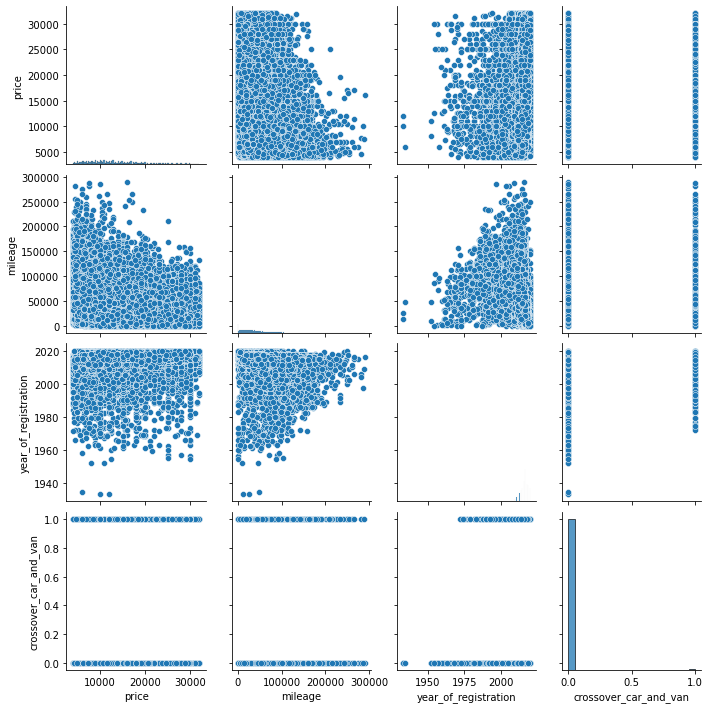

In [104]:
# Correlation matrix plot
ax = sns.pairplot(df[['price','mileage','vehicle_condition','year_of_registration','crossover_car_and_van']])
#ax.fig.suptitle('Correlation matrix plot', y=1.02)

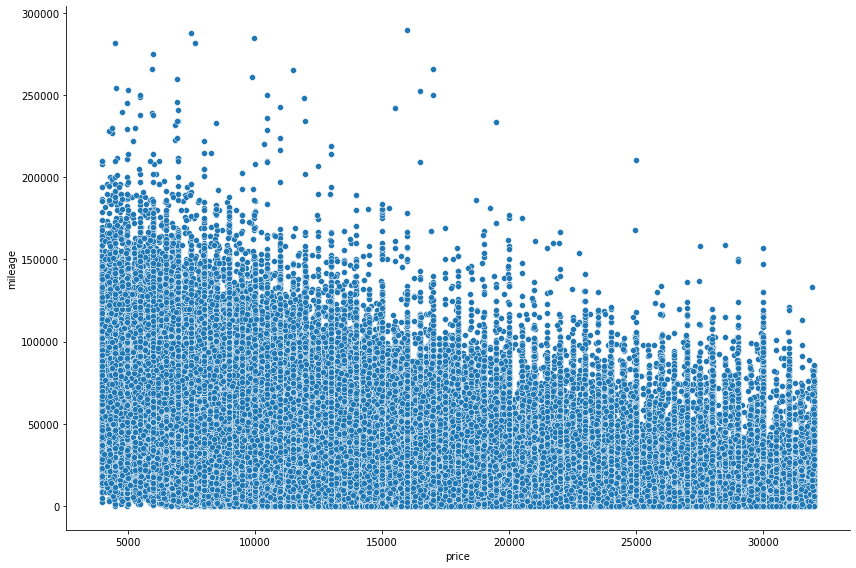

In [105]:
# visualize price vs mileage 
sns.relplot(x="price", y="mileage", 
            data=df,
            kind="scatter",height=8, aspect=1.5)


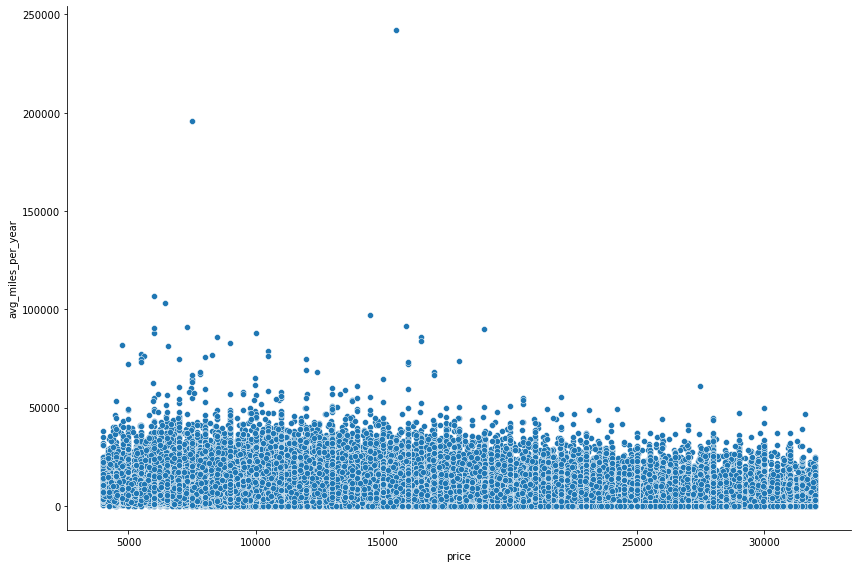

In [106]:
sns.relplot(x="price", y="avg_miles_per_year", 
            data=df,
            kind="scatter",height=8, aspect=1.5)

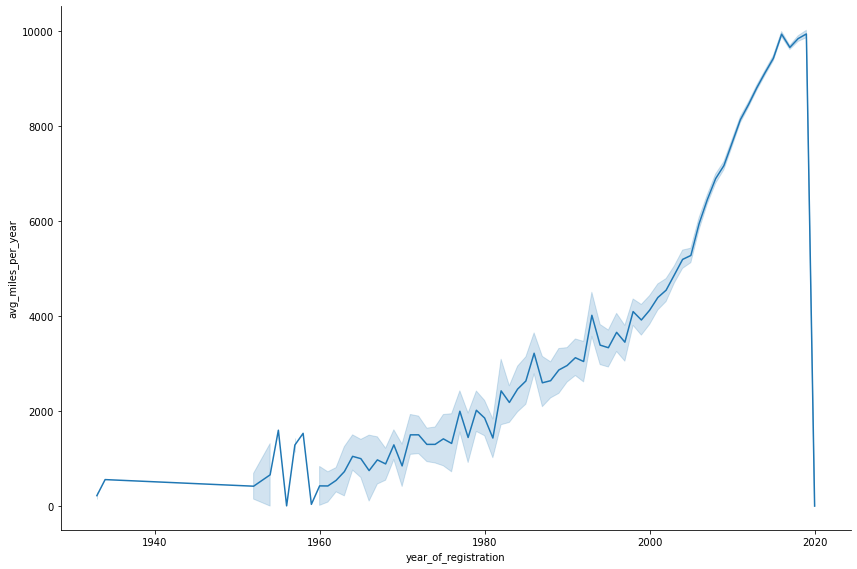

In [107]:
sns.relplot(x="year_of_registration", y="avg_miles_per_year",
            data=df, kind="line",height=8, aspect=1.5)

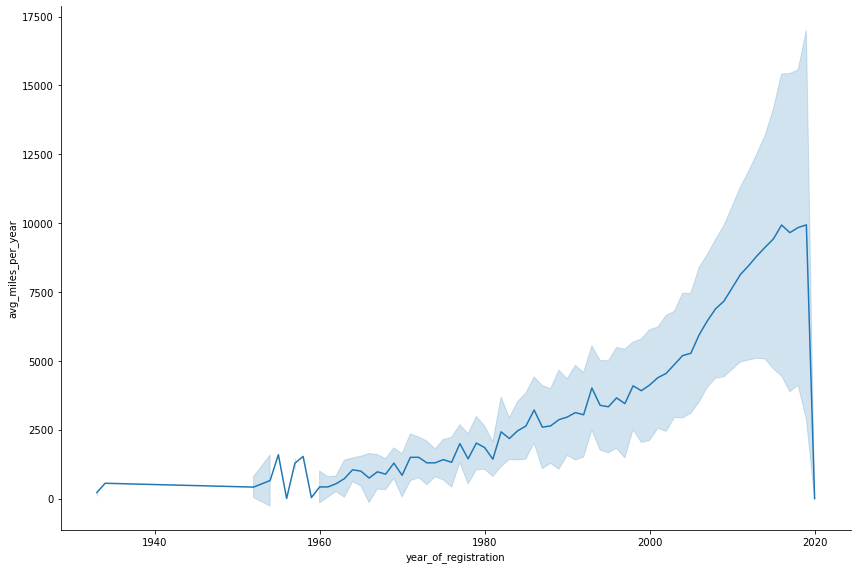

In [108]:
sns.relplot(x="year_of_registration", y="avg_miles_per_year",
            data=df, kind="line", ci="sd",height=8, aspect=1.5)

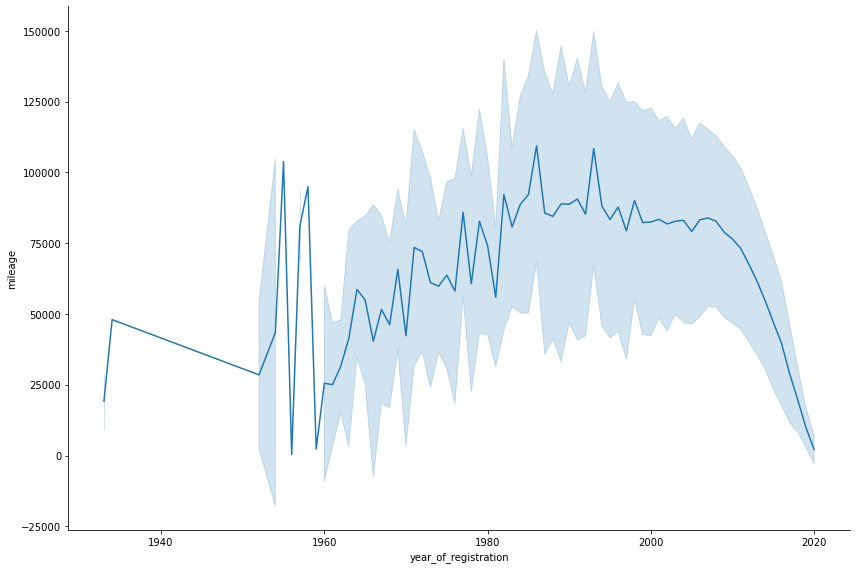

In [109]:
sns.relplot(x="year_of_registration", y="mileage",
            data=df, kind="line", ci="sd",height=8, aspect=1.5)

### 3.2. Quantitative-Categorical (1-2) 

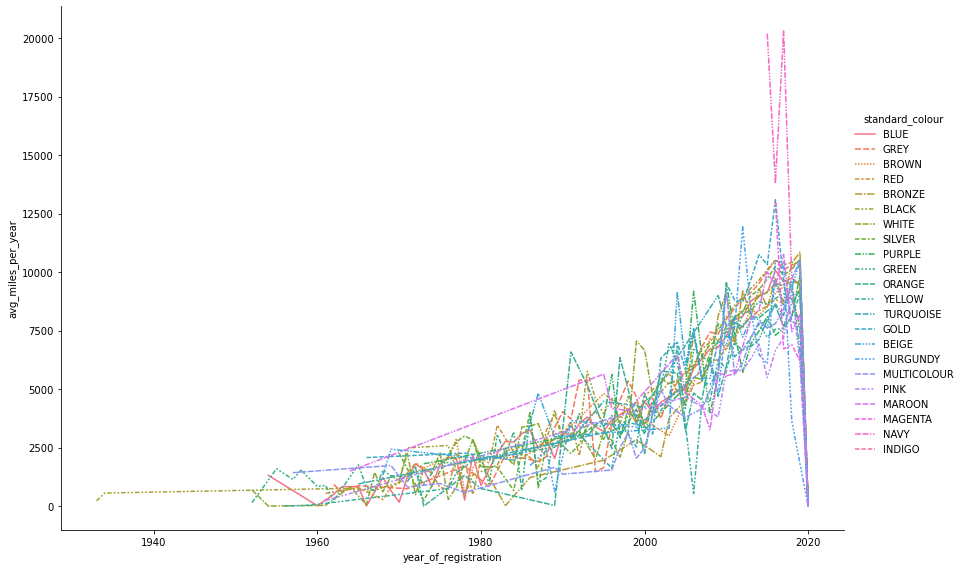

In [110]:
sns.relplot(x="year_of_registration", y="avg_miles_per_year",
            data=df, kind="line", ci=None, style="standard_colour", 
            hue="standard_colour",height=8, aspect=1.5)

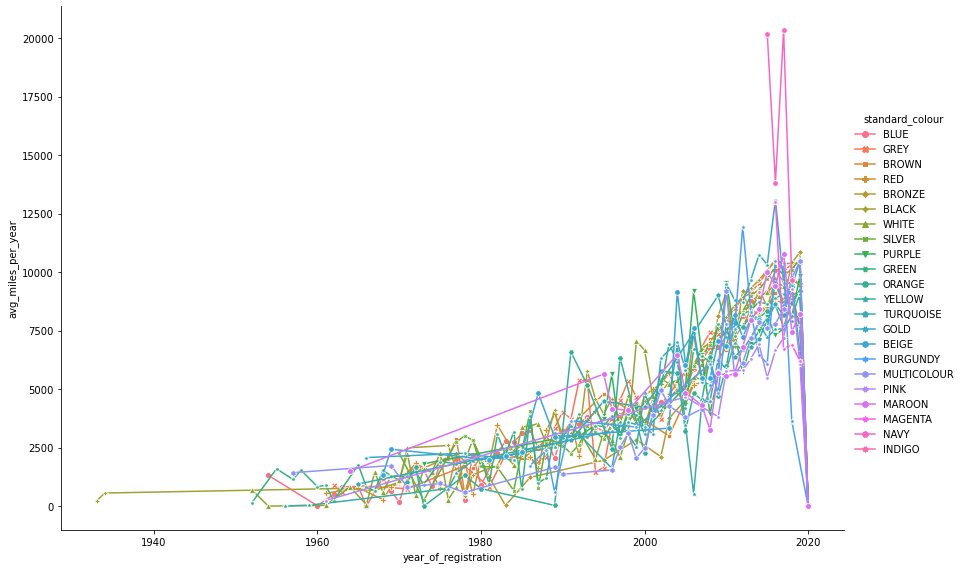

In [111]:
sns.relplot(x="year_of_registration", y="avg_miles_per_year",
            data=df, kind="line", ci=None, style="standard_colour", 
            hue="standard_colour",height=8, aspect=1.5, markers=True, dashes=False)

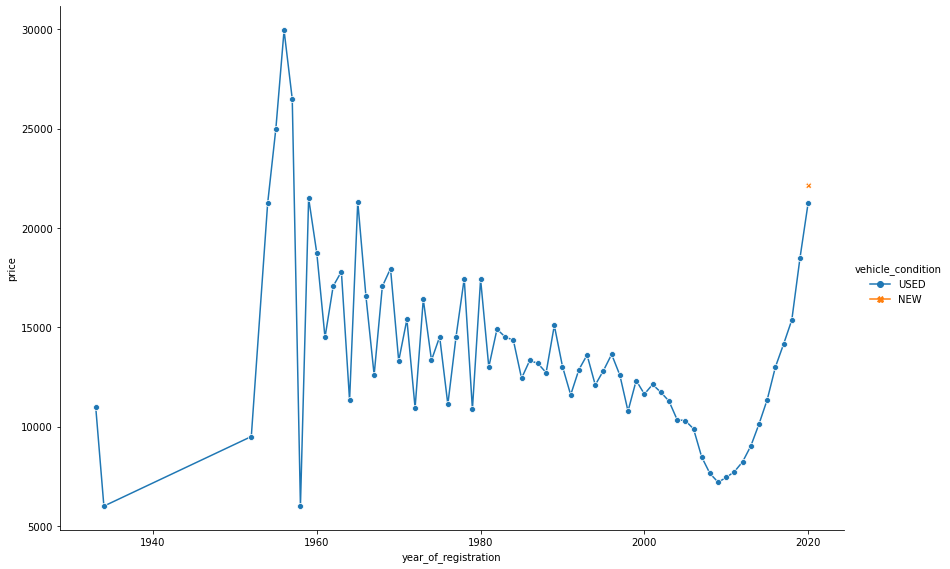

In [112]:
sns.relplot(x="year_of_registration", y="price",
            data=df, kind="line", ci=None, style="vehicle_condition", 
            hue="vehicle_condition",height=8, aspect=1.5, markers=True, dashes=False)

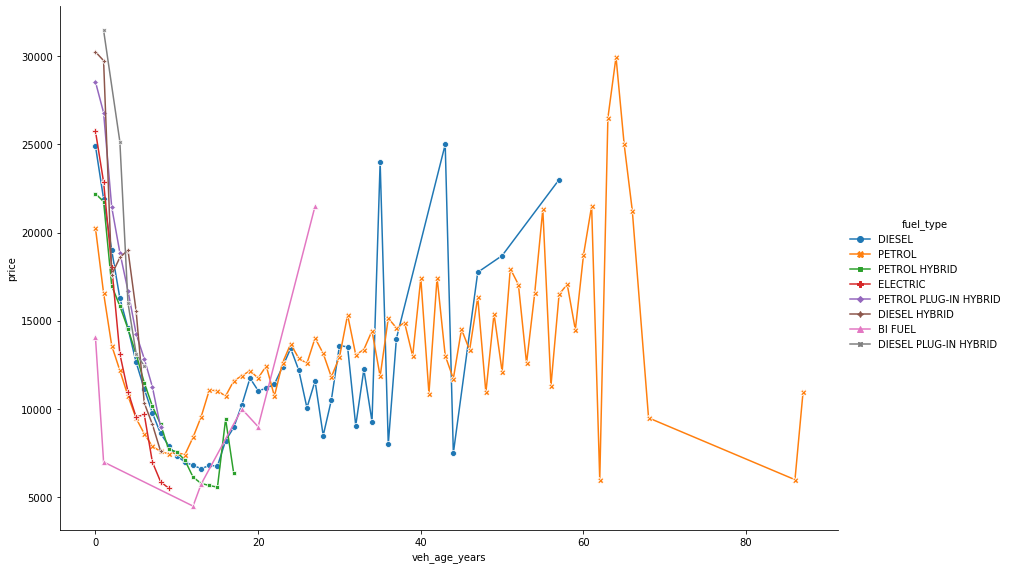

In [113]:
sns.relplot(x="veh_age_years", y="price",
            data=df, kind="line", ci=None, style="fuel_type", 
            hue="fuel_type",height=8, aspect=1.5, markers=True, dashes=False)

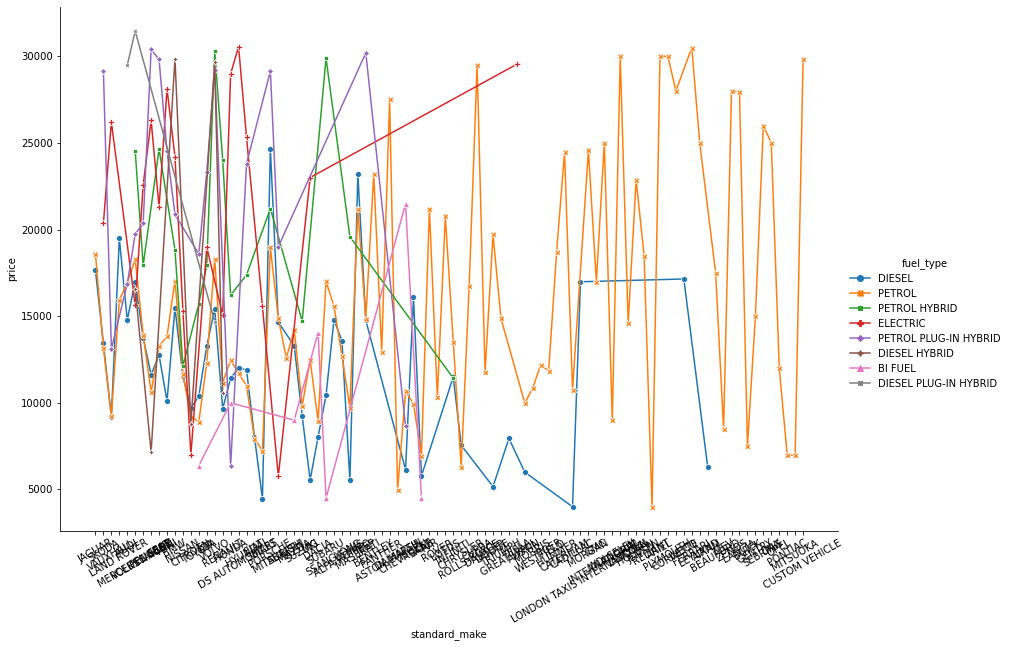

In [114]:
g = sns.relplot(x="standard_make", y="price",
            data=df, kind="line", ci=None, style="fuel_type", 
            hue="fuel_type",height=8, aspect=1.5, markers=True, dashes=False)
g.set_xticklabels(rotation=30)
plt.show()

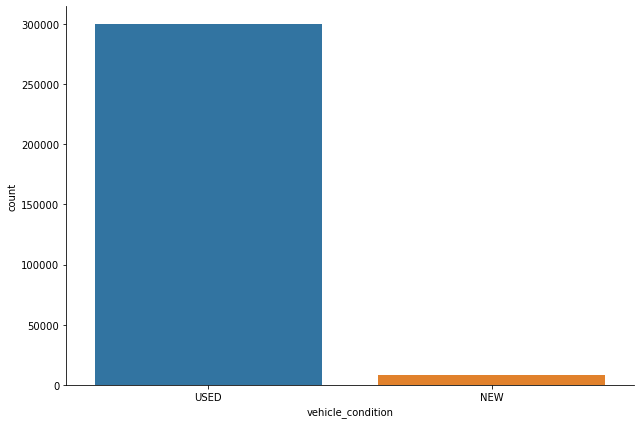

In [115]:
sns.catplot(x="vehicle_condition", data=df,
            kind="count",height=6, aspect=1.5)

(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'mileage'),
  Text(2, 0, 'year_of_registration'),
  Text(3, 0, 'price'),
  Text(4, 0, 'crossover_car_and_van'),
  Text(5, 0, 'veh_age_years'),
  Text(6, 0, 'avg_miles_per_year')])

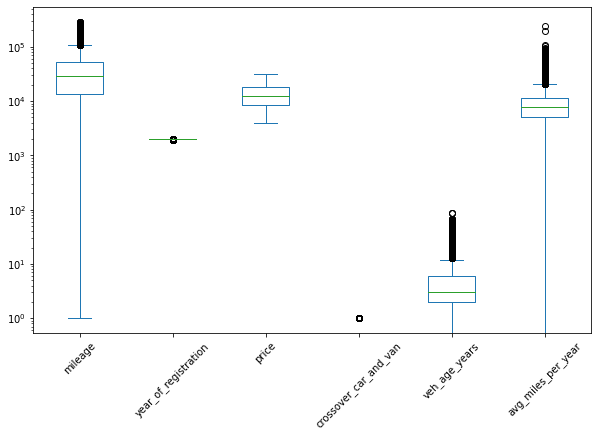

In [116]:
df.plot(kind='box',figsize=(10,6))
plt.yscale('log')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Top-10 on sale brands of Car')

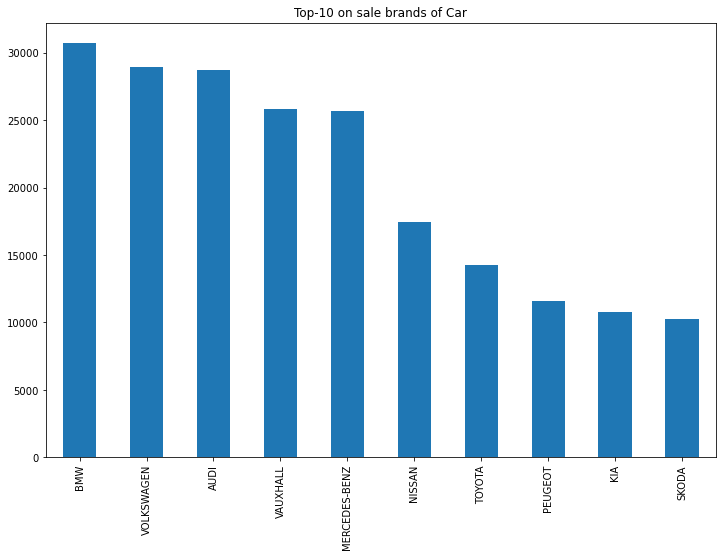

In [117]:
# visualize the top brands of cars
plt.figure(figsize=(12,8))
df.standard_make.value_counts().head(10).plot.bar()
plt.title("Top-10 on sale brands of Car")

The top brands on sale are BMW, AUDI and VOLKSWAGEN these would be high profile people choices

In [118]:
# Top Highest price brand cars
df[df.price.isin(df.price.nlargest())].sort_values(['standard_make','standard_model','body_type','mileage','price'])

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,veh_age_years,avg_miles_per_year
public_reference,,,,,,,,,,,,
202010014448407,2528,BLACK,ALFA ROMEO,STELVIO,USED,2019,31990,SUV,0,DIESEL,1,2528
202009053348364,9821,GREY,ALFA ROMEO,STELVIO,USED,2019,31990,SUV,0,PETROL,1,9821
202009193949502,39701,SILVER,ASTON MARTIN,DB9,USED,2007,31990,COUPE,0,PETROL,13,3053
202010074726848,39000,BLACK,ASTON MARTIN,VANTAGE,USED,2008,31990,COUPE,0,PETROL,12,3250
202011015674780,3000,GREY,AUDI,A3 CABRIOLET,USED,2020,31990,CONVERTIBLE,0,PETROL,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202008082239358,4009,WHITE,VOLVO,XC60,USED,2019,31990,SUV,0,DIESEL,1,4009
202010064647424,5679,SILVER,VOLVO,XC60,USED,2019,31990,SUV,0,PETROL,1,5679
201909071960109,8790,SILVER,VOLVO,XC60,USED,2019,31990,SUV,0,PETROL,1,8790


The top highest selling brand cars prices and models details. This can be used to achieve business goals by marketing to high profile income people.

In [119]:
# Lowest price brand cars
df[df.price.isin(df.price.nsmallest())].sort_values(['standard_make','standard_model','body_type','mileage','price'])

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,veh_age_years,avg_miles_per_year
public_reference,,,,,,,,,,,,
202007151286522,80000,GREEN,FIAT,COUPE,USED,1998,3997,COUPE,0,PETROL,22,3636
202010165065529,13800,WHITE,HYUNDAI,I10,USED,2011,3996,HATCHBACK,0,PETROL,9,1533
202009143711634,68662,SILVER,KIA,PICANTO,USED,2013,3997,HATCHBACK,0,PETROL,7,9808
202010054617028,82726,SILVER,MINI,HATCH,USED,2009,3997,HATCHBACK,0,PETROL,11,7520
202010305611885,48000,GREEN,RENAULT,CLIO,USED,2010,3997,HATCHBACK,0,PETROL,10,4800
202010134950953,78120,BLACK,SEAT,LEON,USED,2012,3996,HATCHBACK,0,DIESEL,8,9765
202010094798981,43000,BLACK,SMART,FORTWO,USED,2013,3996,COUPE,0,PETROL,7,6142
202009083483665,106000,BLACK,VOLKSWAGEN,GOLF,USED,2009,3996,HATCHBACK,0,PETROL,11,9636


The top 5 lowest selling brand cars prices and models details. This can be used to achieve business goals by marketing to low and middle class profile income people.

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(-25.0, 0, '(2017, ELECTRIC)'),
  Text(0.0, 0, '(1933, PETROL)'),
  Text(25.0, 0, '(1973, PETROL)'),
  Text(50.0, 0, '(1989, PETROL)'),
  Text(75.0, 0, '(2001, DIESEL)'),
  Text(100.0, 0, '(2009, DIESEL)'),
  Text(125.0, 0, '(2014, ELECTRIC)'),
  Text(150.0, 0, '(2018, DIESEL)'),
  Text(175.0, 0, ''),
  Text(200.0, 0, '')])

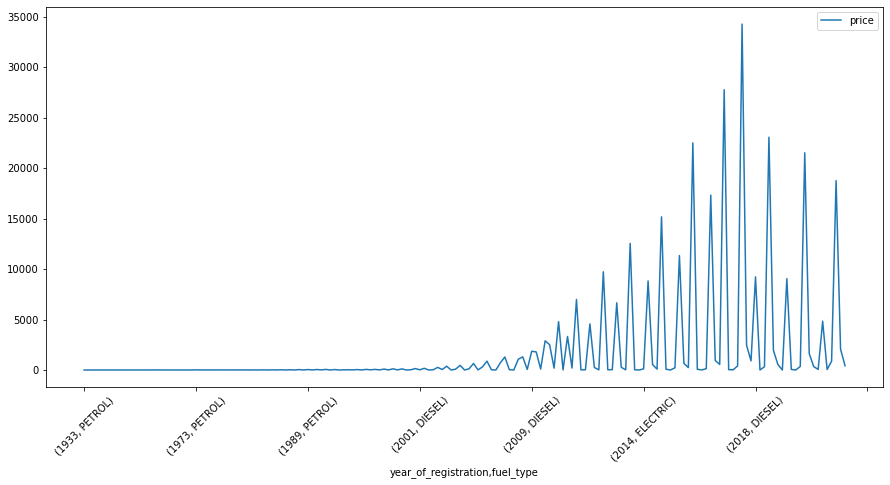

In [120]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['year_of_registration','fuel_type']).count()['price'].plot(ax=ax, legend=True)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='year_of_registration,body_type'>

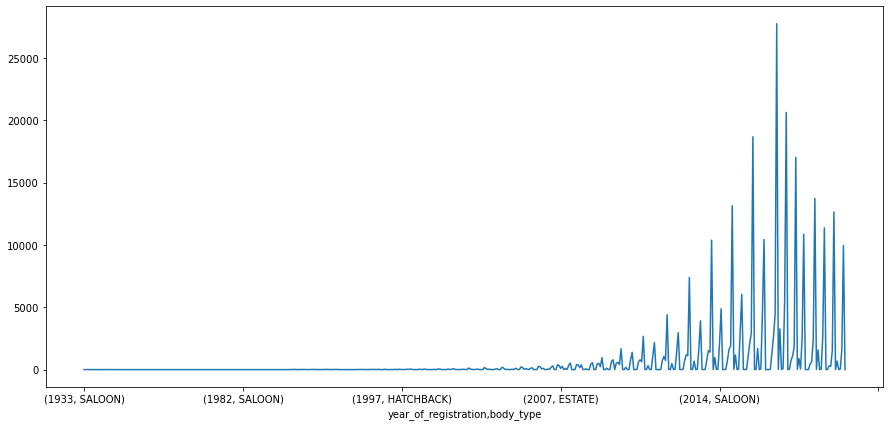

In [121]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['year_of_registration','body_type']).count()['price'].plot(ax=ax)

### 3.3. Categorical-Categorical (1-2)

Text(0.5, 1.0, 'Mostly used Engine Type over the years')

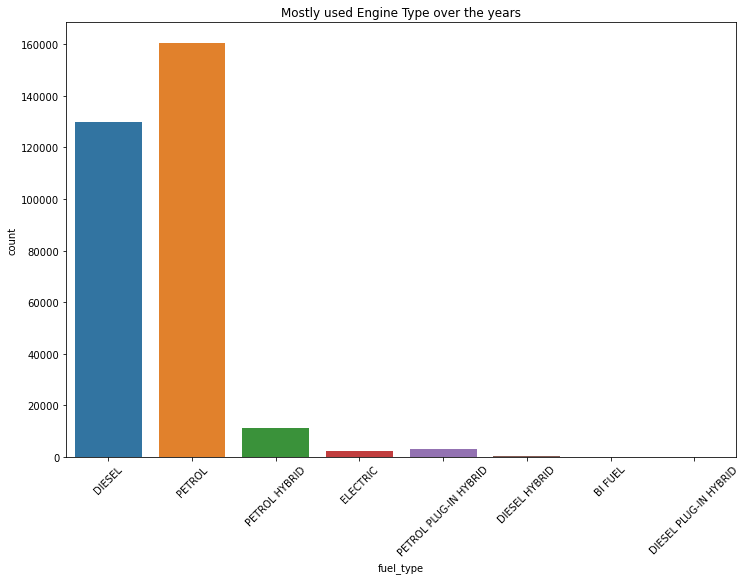

In [122]:
# Plot of Fuel Type 
plt.figure(figsize=(12,8))
sns.countplot(x='fuel_type', data=df, orient='h')
plt.xticks(rotation=45)
plt.title("Mostly used Engine Type over the years")


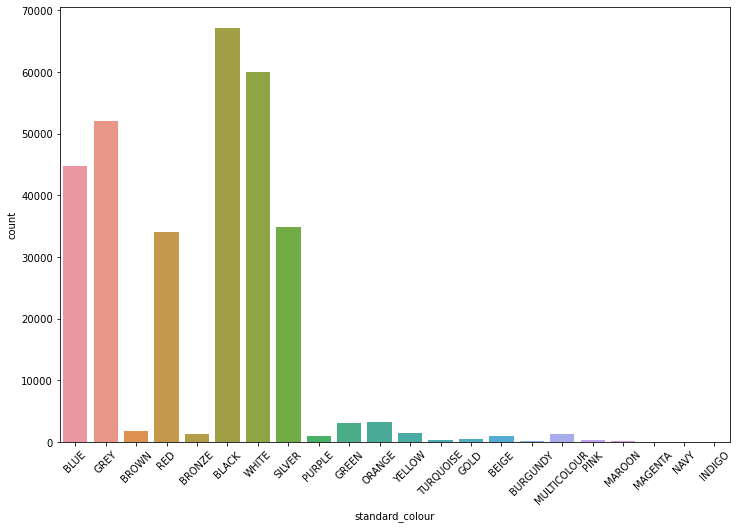

In [123]:
# Count plots of categorical features
cat_feat = ['standard_colour', 'vehicle_condition', 'body_type', 'fuel_type']
plt.figure(figsize=(12,8))
sns.countplot(x=df[cat_feat[0]])
#plt.yscale("log")
plt.xticks(rotation=45)
plt.show()

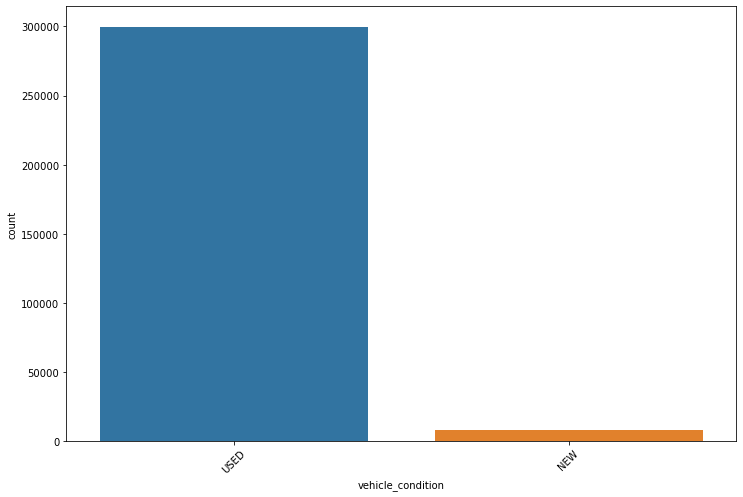

In [124]:
# Plot of vehicle condition
plt.figure(figsize=(12,8))
sns.countplot(x=df[cat_feat[1]])
#plt.yscale("log")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Mostly used Body Types over the years')

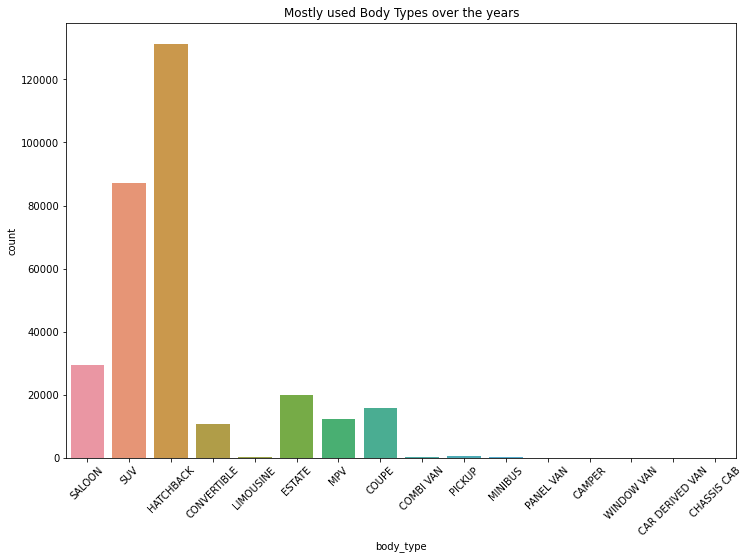

In [125]:
# Plot of Body Type 
plt.figure(figsize=(12,8))
sns.countplot(x='body_type', data=df, orient='h')
plt.xticks(rotation=45)
plt.title("Mostly used Body Types over the years")

Text(0.5, 1.0, 'The mostly used body type')

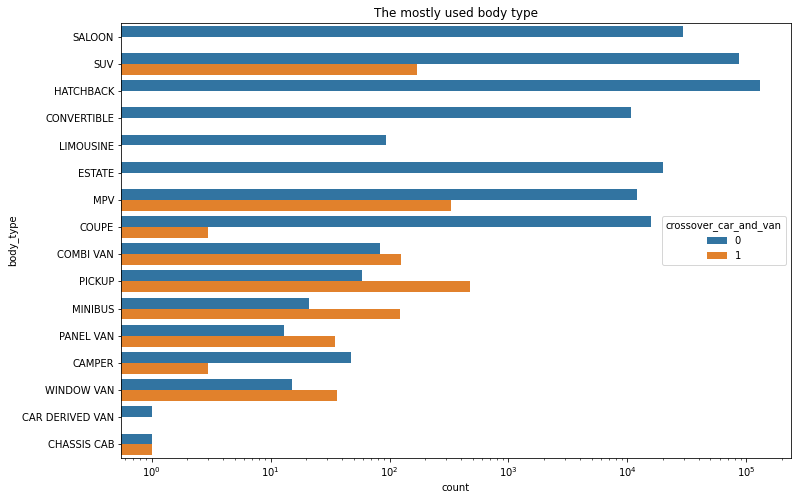

In [126]:
plt.figure(figsize=(12,8))
sns.countplot(y='body_type', data=df, hue='crossover_car_and_van')
plt.xscale('log')
plt.title("The mostly used body type")